# hw2: Решающие деревья

*Спасибо великому курсу великого Евгения Соколова*

### О задании

Задание состоит из двух разделов:
1. В первом разделе вы научитесь применять деревья из sklearn для задачи классификации. Вы посмотрите какие разделяющие поверхности деревья строят для различных датасетов и проанализируете их зависимость от различных гиперпараметров.
2. Во втором разделе вы попробуете реализовать свое решающее дерево и сравните его со стандартное имплементацией из sklearn. Вы также протестируете деревья на более сложных датасетах и сравните различные подходы к кодированию категориальных признаков.

Все данные, на которых будут обучаться модели, вы можете найти на диске.

### Оценивание и штрафы
Каждая из задач имеет определенную «стоимость» (указана в скобках около задачи). Максимально допустимая оценка за работу — 10 баллов. Неэффективная и/или неоригинальная реализация кода может негативно отразиться на оценке.

### Формат сдачи
Заполненный ноутбук ```hw2-trees.ipynb``` и модуль с реализованными функциями и классами ```hw2code.py``` необходимо загрузить на свой Github. Затем нужно оставить комментарий в Google-таблице с оценками в столбце <<hw2>> в строке со своей фамилией о том, что вы выполнили работу с указанием ника на Kaggle.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from matplotlib.colors import Colormap, ListedColormap
import pandas as pd
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set(style='whitegrid')

import warnings
warnings.filterwarnings('ignore')

# 1. Решающие деревья. Визуализация.

В этой части мы рассмотрим два простых двумерных датасета сделанных с помощью `make_moons`, `make_circles` и посмотрим как ведет себя разделяющая поверхность в зависимости от различных гиперпараметров.

In [2]:
from sklearn.datasets import make_moons, make_circles, make_classification
datasets = [
    make_circles(noise=0.2, factor=0.5, random_state=42),
    make_moons(noise=0.2, random_state=42),
    make_classification(n_classes=3, n_clusters_per_class=1, n_features=2, class_sep=.8, random_state=3,
                        n_redundant=0)
]

In [3]:
palette = sns.color_palette(n_colors=3)
cmap = ListedColormap(palette)

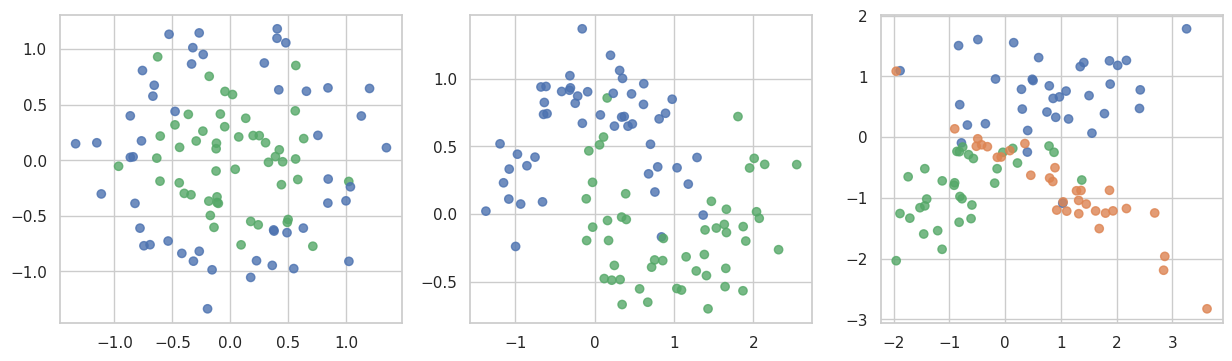

In [4]:
plt.figure(figsize=(15, 4))
for i, (x, y) in enumerate(datasets):
    plt.subplot(1, 3, i + 1)
    plt.scatter(x[:, 0], x[:, 1], c=y, cmap=cmap, alpha=.8)

__Задание 1. (1 балл)__

Для каждого датасета обучите решающее дерево с параметрами по умолчанию, предварительно разбив выборку на обучающую и тестовую. Постройте разделящие поверхности (для этого воспользуйтесь функцией `plot_surface`, пример ниже). Посчитайте accuracy на обучающей и тестовой выборках. Сильно ли деревья переобучились?

In [5]:
def plot_surface(clf, X, y):
    plot_step = 0.01
    palette = sns.color_palette(n_colors=len(np.unique(y)))
    cmap = ListedColormap(palette)
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))
    plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=cmap, alpha=0.3)

    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap, alpha=.7,
                edgecolors=np.array(palette)[y], linewidths=2)

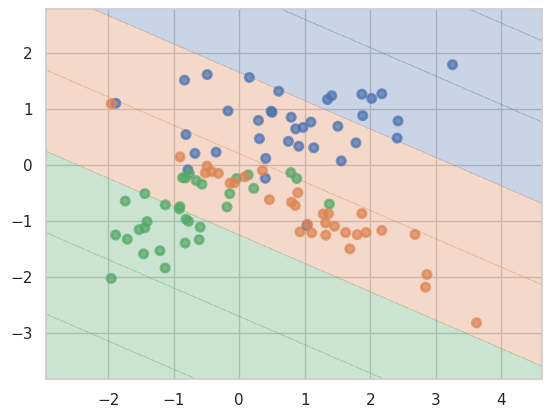

In [6]:
# Пример:
from sklearn.linear_model import LinearRegression
X, y = datasets[2]
lr  = LinearRegression().fit(X, y)
plot_surface(lr, X, y)

Dataset 1: Train accuracy = 1.0000, test accuracy = 0.7333, difference = 0.2667
Dataset 2: Train accuracy = 1.0000, test accuracy = 0.8667, difference = 0.1333
Dataset 3: Train accuracy = 1.0000, test accuracy = 0.8333, difference = 0.1667


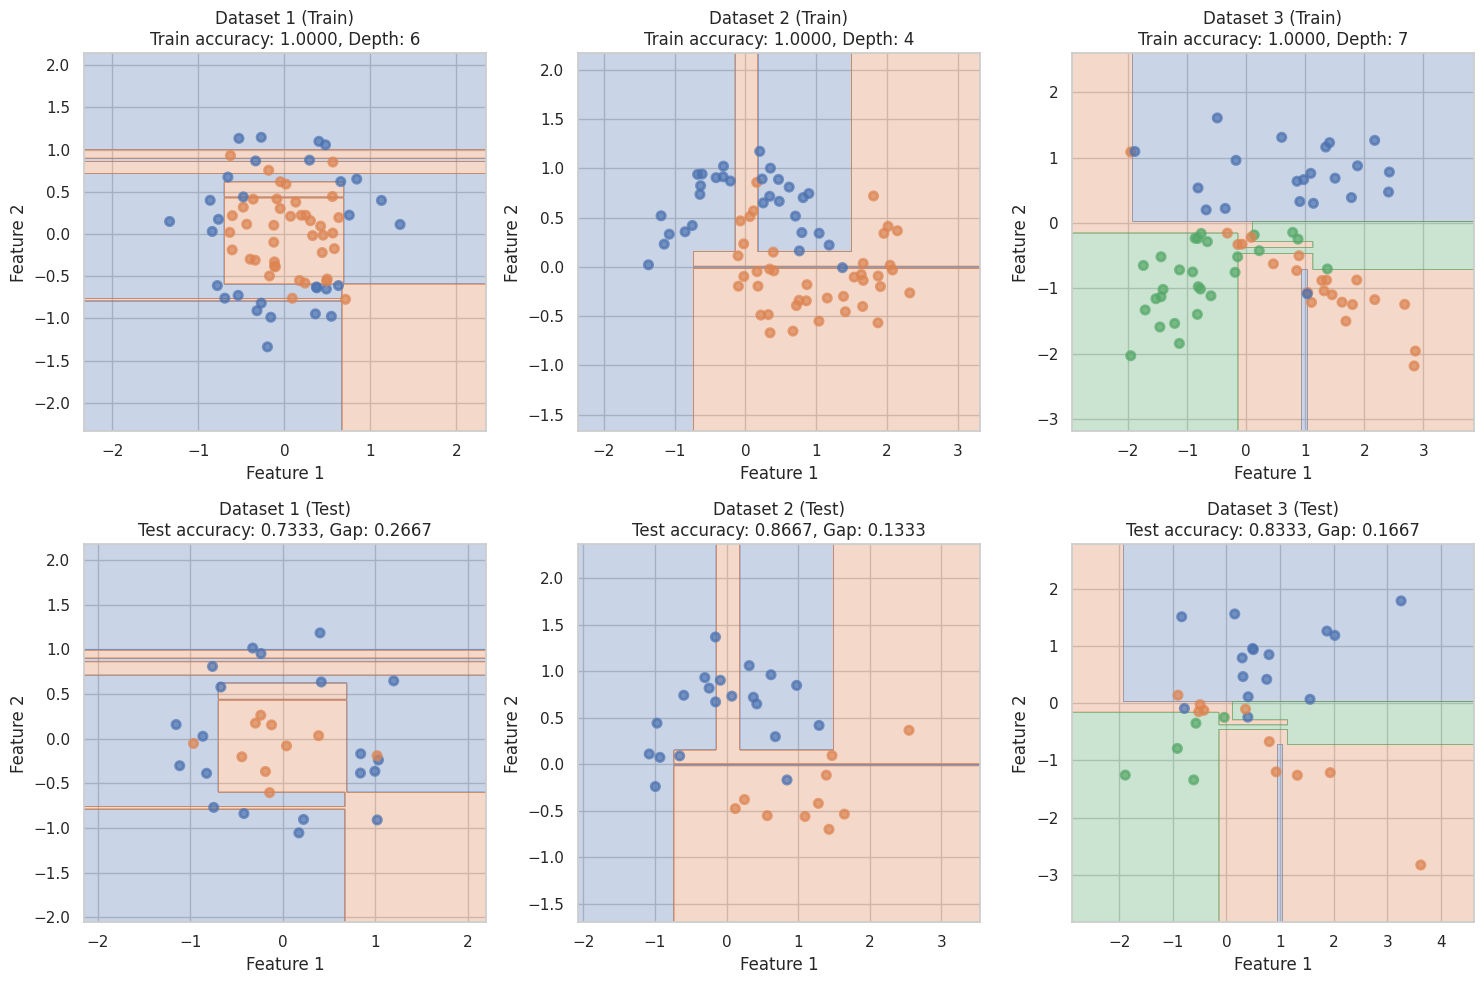

In [17]:
from sklearn.metrics import accuracy_score

dataset_names = [
    "Concentric Circles",
    "Moons",
    "3-Class Classification"
]

plt.figure(figsize=(15, 10))

for i, (X, y) in enumerate(datasets):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    clf = DecisionTreeClassifier(random_state=42)
    clf.fit(X_train, y_train)

    train_accuracy = accuracy_score(y_train, clf.predict(X_train))
    test_accuracy = accuracy_score(y_test, clf.predict(X_test))
    diff = abs(train_accuracy - test_accuracy)

    plt.subplot(2, 3, i + 1)
    plot_surface(clf, X_train, y_train)
    plt.title(f'Dataset {i+1} (Train)\nTrain accuracy: {train_accuracy:.4f}, Depth: {clf.get_depth()}')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')

    plt.subplot(2, 3, i + 4)
    plot_surface(clf, X_test, y_test)
    plt.title(f'Dataset {i+1} (Test)\nTest accuracy: {test_accuracy:.4f}, Gap: {diff:.4f}')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')

    print(f'Dataset {i+1}: Train accuracy = {train_accuracy:.4f}, test accuracy = {test_accuracy:.4f}, difference = {diff:.4f}')

plt.tight_layout()
plt.show()

__Ответ:__ Деревья сильно переобучены. Есть сильное падение точности на тестовой выборке. Train accuracy = 1 для всех датасетов, значит деревья с параметрами по умолчанию полностью подстраиваются под обучающие данные.

__Задание 2. (1.5 балла)__

Попробуйте перебрать несколько параметров для регуляризации (напр. `max_depth`, `min_samples_leaf`). Для каждого набора гиперпараметров постройте разделяющую поверхность, выведите обучающую и тестовую ошибки. Можно делать кросс-валидацию или просто разбиение на трейн и тест, главное делайте каждый раз одинаковое разбиение, чтобы можно было корректно сравнивать (помните же, что итоговое дерево сильно зависит от небольшого изменения обучающей выборки?). Проследите как меняется разделяющая поверхность и обобщающая способность. Почему так происходит, одинаково ли изменение для разных датасетов?


Analysis of dataset: Concentric Circles
max_depth= 2, min_samples_leaf= 1: Train=0.814, Test=0.633, Gap=0.181
max_depth= 2, min_samples_leaf= 5: Train=0.814, Test=0.633, Gap=0.181
max_depth= 2, min_samples_leaf=20: Train=0.686, Test=0.700, Gap=-0.014
max_depth= 2, min_samples_leaf=50: Train=0.500, Test=0.500, Gap=0.000
max_depth= 3, min_samples_leaf= 1: Train=0.900, Test=0.733, Gap=0.167
max_depth= 3, min_samples_leaf= 5: Train=0.900, Test=0.733, Gap=0.167
max_depth= 3, min_samples_leaf=20: Train=0.686, Test=0.700, Gap=-0.014
max_depth= 3, min_samples_leaf=50: Train=0.500, Test=0.500, Gap=0.000
max_depth= 5, min_samples_leaf= 1: Train=0.986, Test=0.700, Gap=0.286
max_depth= 5, min_samples_leaf= 5: Train=0.943, Test=0.833, Gap=0.110
max_depth= 5, min_samples_leaf=20: Train=0.686, Test=0.700, Gap=-0.014
max_depth= 5, min_samples_leaf=50: Train=0.500, Test=0.500, Gap=0.000
max_depth=10, min_samples_leaf= 1: Train=1.000, Test=0.700, Gap=0.300
max_depth=10, min_samples_leaf= 5: Train=0.943

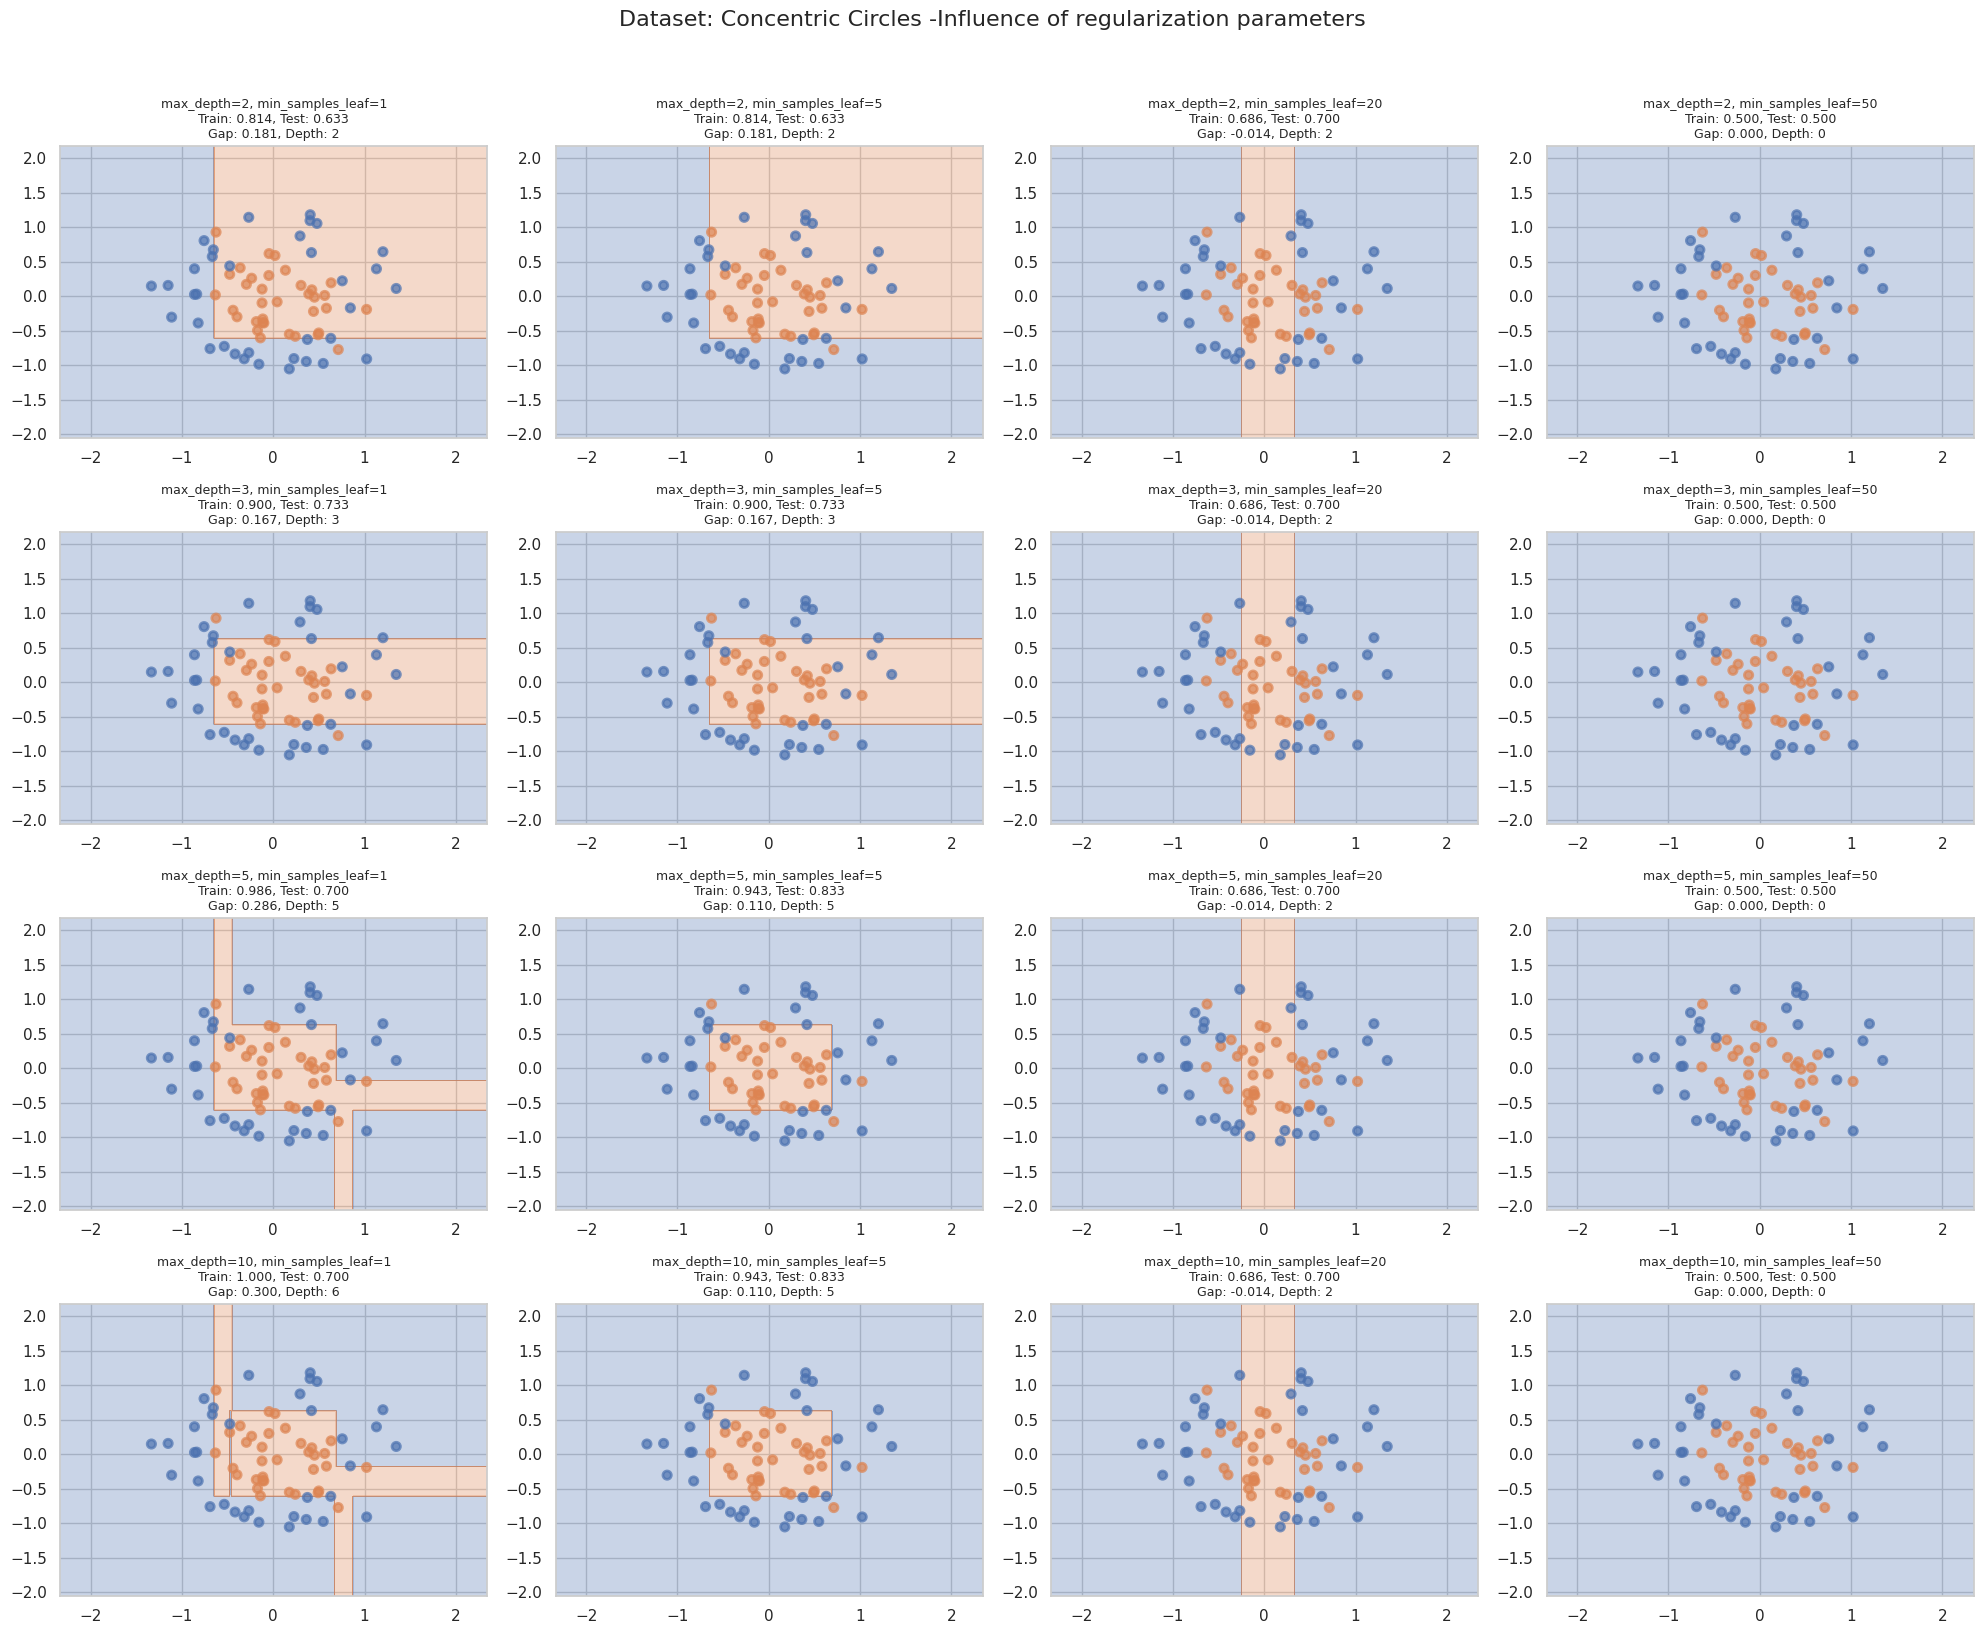


Analysis of dataset: Moons
max_depth= 2, min_samples_leaf= 1: Train=0.929, Test=0.933, Gap=-0.005
max_depth= 2, min_samples_leaf= 5: Train=0.900, Test=0.800, Gap=0.100
max_depth= 2, min_samples_leaf=20: Train=0.857, Test=0.767, Gap=0.090
max_depth= 2, min_samples_leaf=50: Train=0.500, Test=0.500, Gap=0.000
max_depth= 3, min_samples_leaf= 1: Train=0.929, Test=0.933, Gap=-0.005
max_depth= 3, min_samples_leaf= 5: Train=0.900, Test=0.800, Gap=0.100
max_depth= 3, min_samples_leaf=20: Train=0.857, Test=0.767, Gap=0.090
max_depth= 3, min_samples_leaf=50: Train=0.500, Test=0.500, Gap=0.000
max_depth= 5, min_samples_leaf= 1: Train=0.971, Test=0.933, Gap=0.038
max_depth= 5, min_samples_leaf= 5: Train=0.900, Test=0.800, Gap=0.100
max_depth= 5, min_samples_leaf=20: Train=0.857, Test=0.767, Gap=0.090
max_depth= 5, min_samples_leaf=50: Train=0.500, Test=0.500, Gap=0.000
max_depth=10, min_samples_leaf= 1: Train=1.000, Test=0.933, Gap=0.067
max_depth=10, min_samples_leaf= 5: Train=0.900, Test=0.800, 

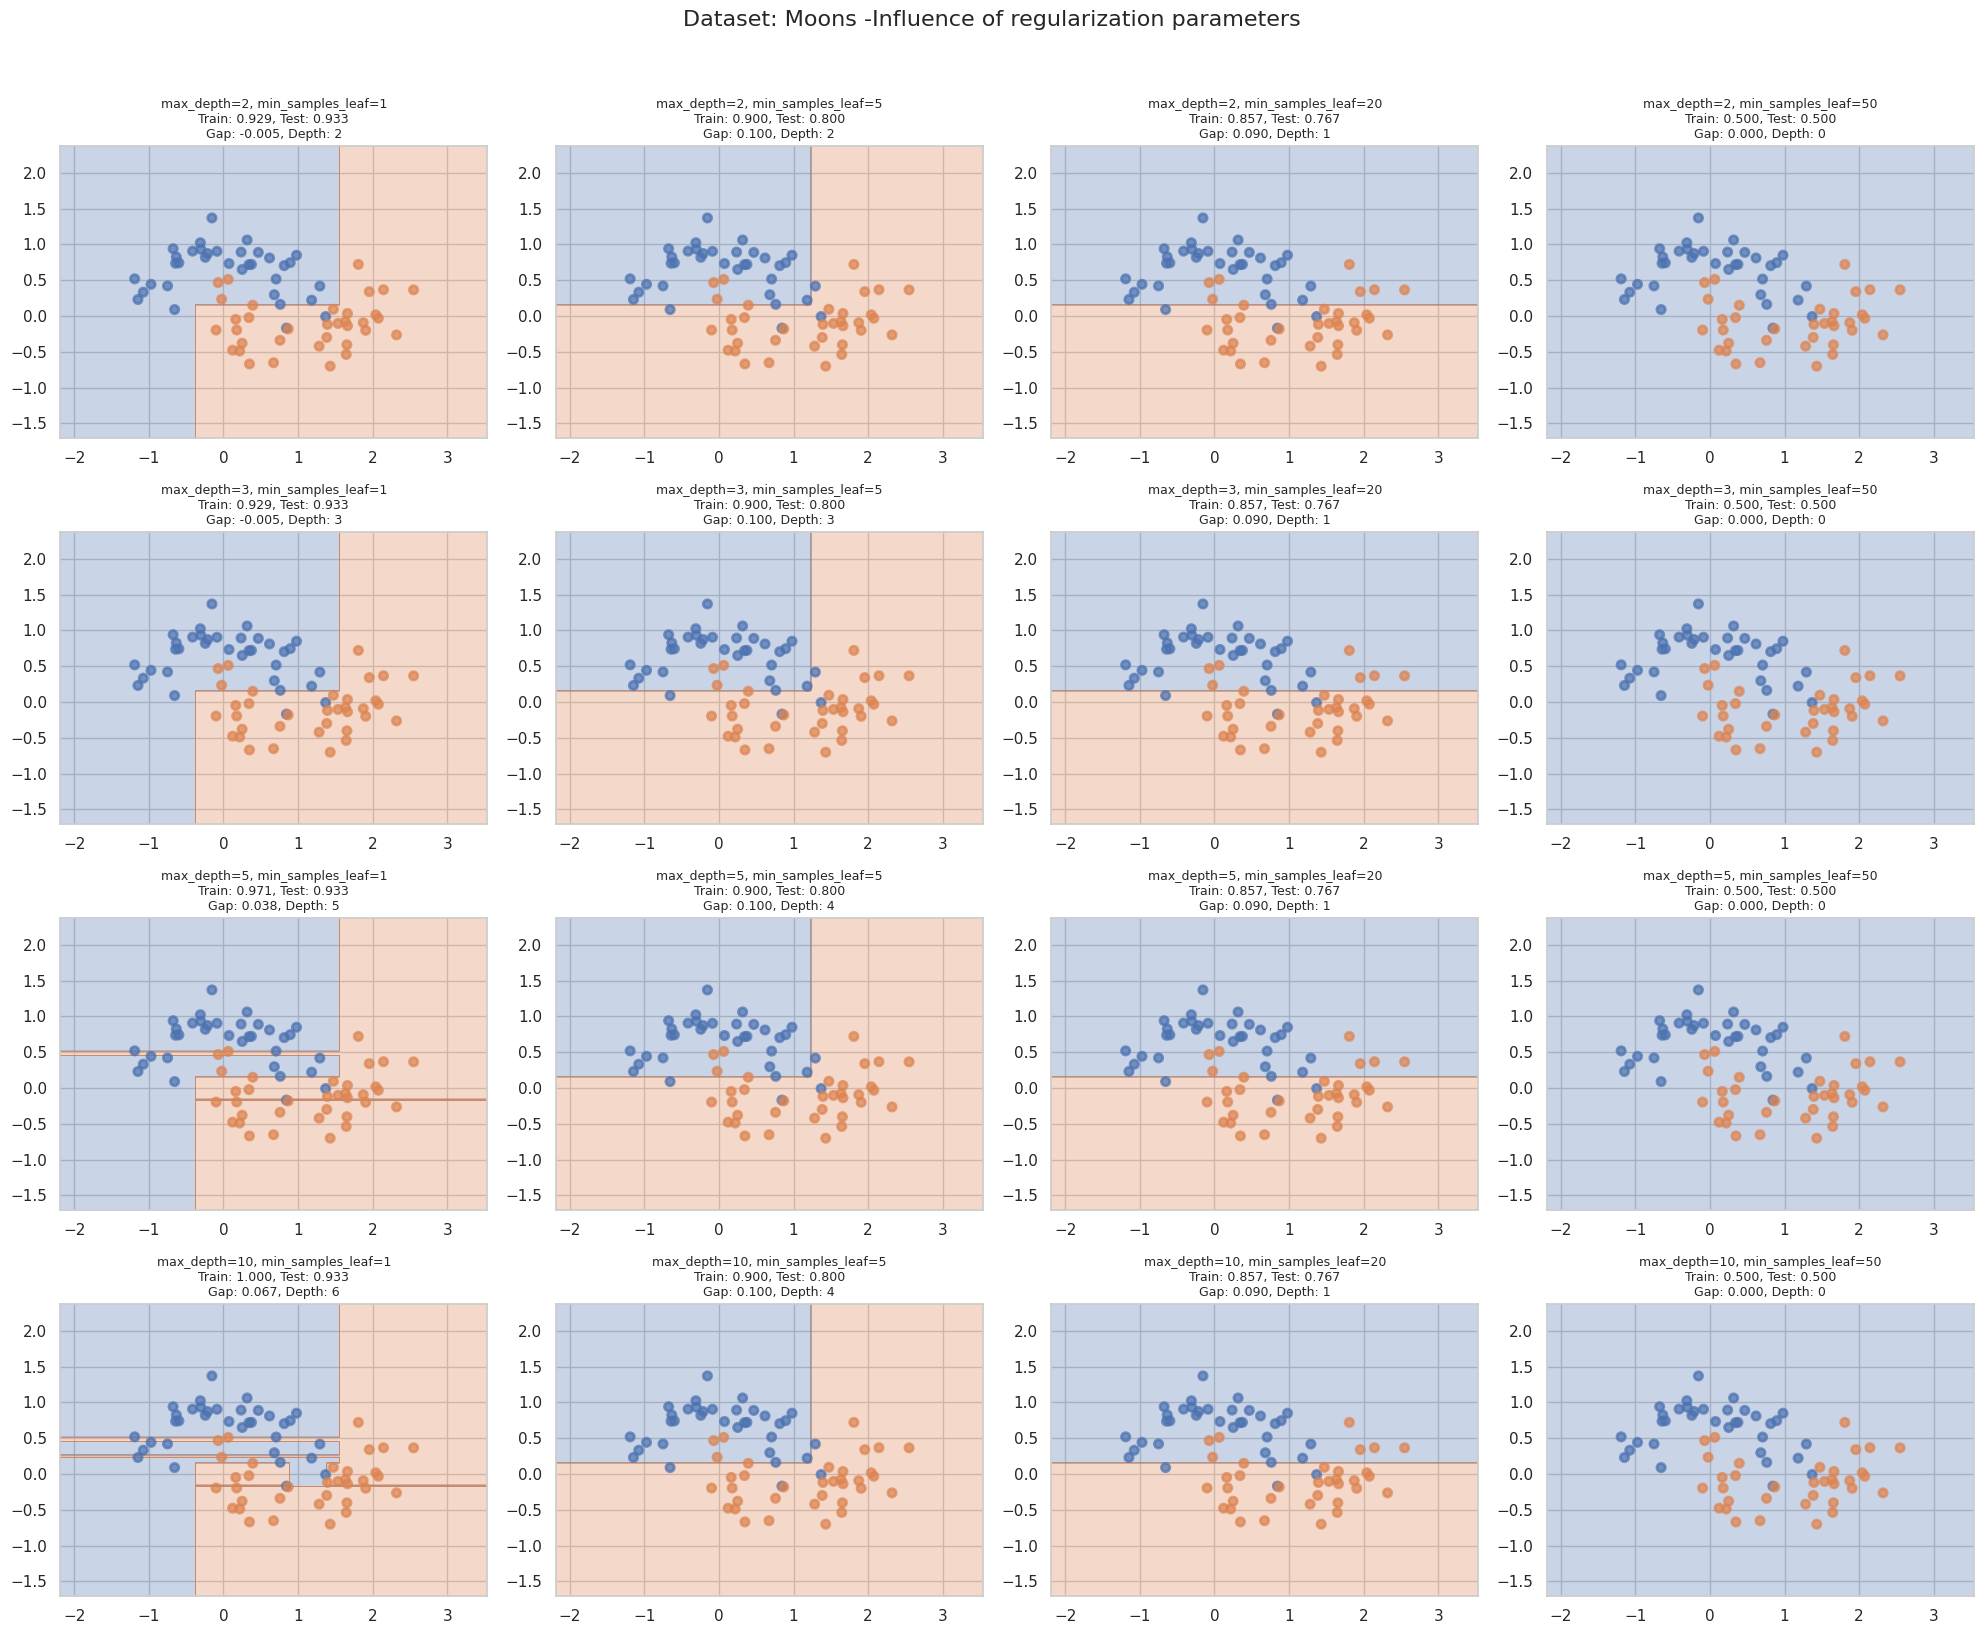


Analysis of dataset: 3-Class Classification
max_depth= 2, min_samples_leaf= 1: Train=0.900, Test=0.833, Gap=0.067
max_depth= 2, min_samples_leaf= 5: Train=0.886, Test=0.833, Gap=0.052
max_depth= 2, min_samples_leaf=20: Train=0.886, Test=0.800, Gap=0.086
max_depth= 2, min_samples_leaf=50: Train=0.357, Test=0.367, Gap=-0.010
max_depth= 3, min_samples_leaf= 1: Train=0.914, Test=0.833, Gap=0.081
max_depth= 3, min_samples_leaf= 5: Train=0.886, Test=0.833, Gap=0.052
max_depth= 3, min_samples_leaf=20: Train=0.886, Test=0.800, Gap=0.086
max_depth= 3, min_samples_leaf=50: Train=0.357, Test=0.367, Gap=-0.010
max_depth= 5, min_samples_leaf= 1: Train=0.986, Test=0.667, Gap=0.319
max_depth= 5, min_samples_leaf= 5: Train=0.886, Test=0.833, Gap=0.052
max_depth= 5, min_samples_leaf=20: Train=0.886, Test=0.800, Gap=0.086
max_depth= 5, min_samples_leaf=50: Train=0.357, Test=0.367, Gap=-0.010
max_depth=10, min_samples_leaf= 1: Train=1.000, Test=0.667, Gap=0.333
max_depth=10, min_samples_leaf= 5: Train=0

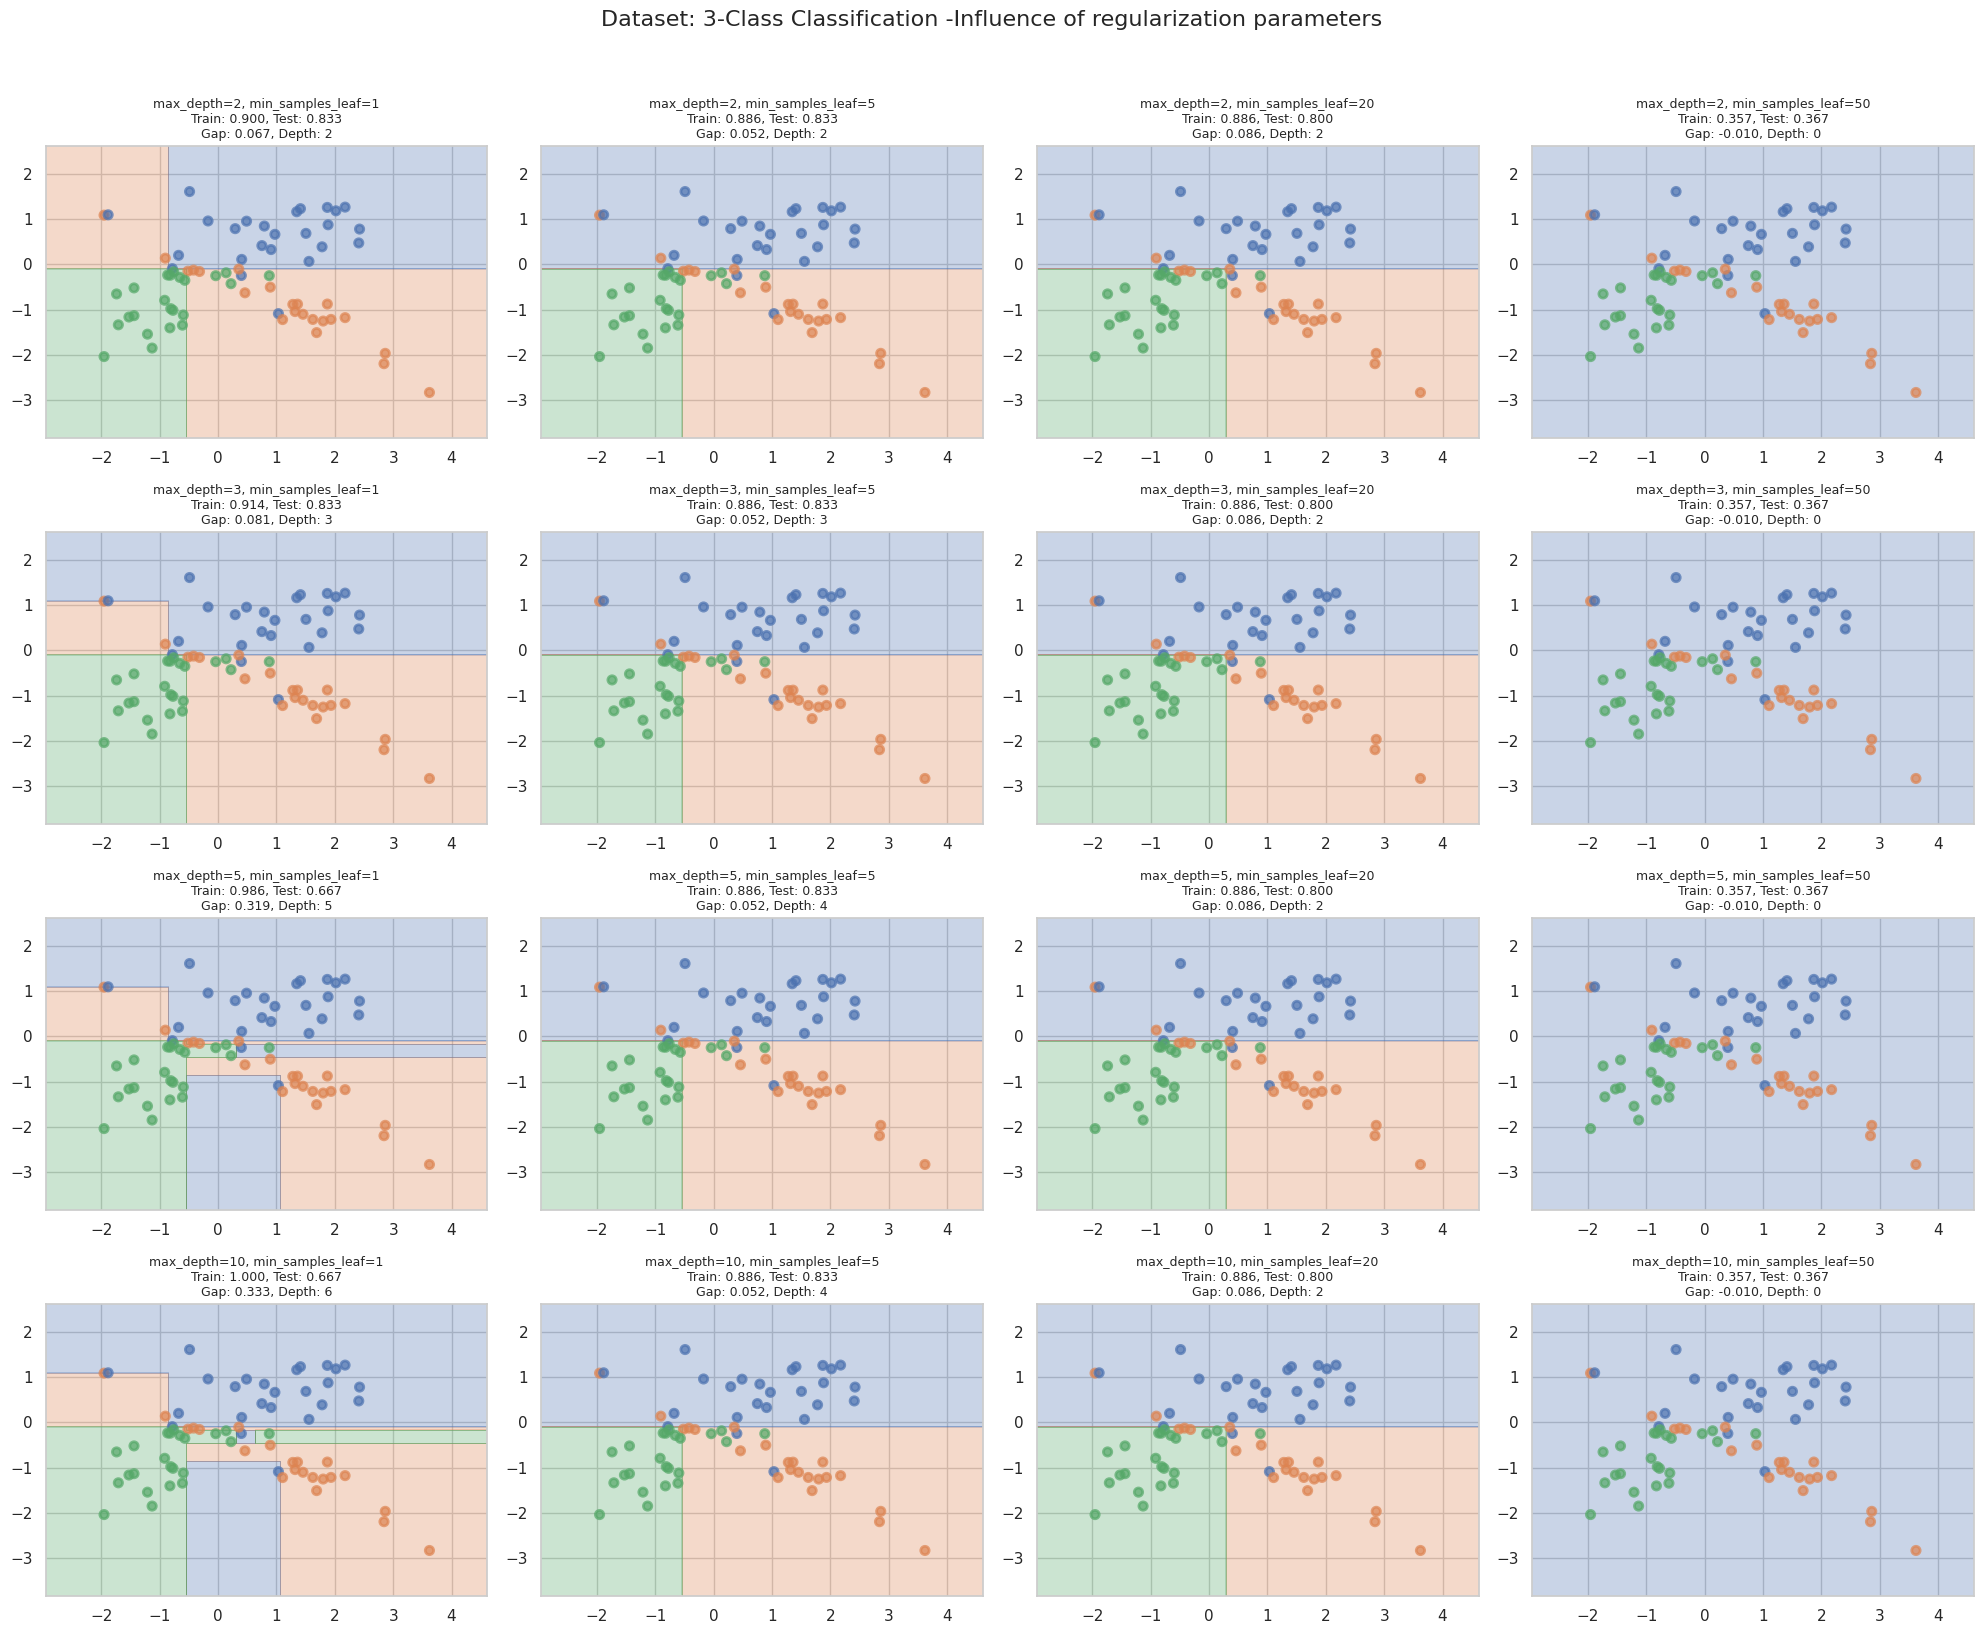

In [21]:
max_depths = [2, 3, 5, 10]
min_samples_leaves = [1, 5, 20, 50]
random_state = 42

for dataset_idx, ((X, y), dataset_name) in enumerate(zip(datasets, dataset_names)):
    print(f"\n{'='*60}")
    print(f"Analysis of dataset: {dataset_name}")
    print(f"{'='*60}")

    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.3, random_state=random_state, stratify=y
    )

    fig, axes = plt.subplots(len(max_depths), len(min_samples_leaves),
                            figsize=(20, 4*len(max_depths)))

    if len(max_depths) == 1 or len(min_samples_leaves) == 1:
        axes = np.array(axes).reshape(len(max_depths), len(min_samples_leaves))

    for i, max_depth in enumerate(max_depths):
        for j, min_samples_leaf in enumerate(min_samples_leaves):
            clf = DecisionTreeClassifier(
                max_depth=max_depth,
                min_samples_leaf=min_samples_leaf,
                random_state=random_state
            )
            clf.fit(X_train, y_train)

            train_acc = accuracy_score(y_train, clf.predict(X_train))
            test_acc = accuracy_score(y_test, clf.predict(X_test))
            gap = train_acc - test_acc

            plt.sca(axes[i, j])
            plot_surface(clf, X_train, y_train)

            axes[i, j].set_title(
                f'max_depth={max_depth}, min_samples_leaf={min_samples_leaf}\n'
                f'Train: {train_acc:.3f}, Test: {test_acc:.3f}\n'
                f'Gap: {gap:.3f}, Depth: {clf.get_depth()}',
                fontsize=9
            )

            print(f"max_depth={max_depth:2}, min_samples_leaf={min_samples_leaf:2}: "
                  f"Train={train_acc:.3f}, Test={test_acc:.3f}, Gap={gap:.3f}")

    plt.suptitle(f'Dataset: {dataset_name} -Influence of regularization parameters',
                fontsize=16, y=1.02)
    plt.tight_layout()
    plt.show()

__Ответ:__
Оптимальные значения параметров регуляризации сильно зависят от структуры данных. Наиболее стабильным параметром оказался min_samples_leaf=5, который обеспечивает хороший баланс на всех датасетах.
#Датасет 1:
Лучшая test accuracy: 0.833 (достигается при max_depth=2-3,min_samples_leaf=1-5)
Сильное переобучение: при max_depth>=5, min_samples_leaf=1 (Gap=0.319-0.333)
Недообучение: при min_samples_leaf=50 (accuracy ~0.36)
#Датасет 2:
Лучшая test accuracy: 0.933 (при max_depth=2-3, min_samples_leaf=1)
Наименьшее переобучение: Gap=-0.005 (то есть, модель лучше обобщает)
Стабильно хорошие результаты: при min_samples_leaf=1
#Датасет 3:
Лучшая test accuracy: 0.833 (при max_depth=5-10, min_samples_leaf=5)
Самый сложный датасет для деревьев.
Сильное переобучение: при max_depth>=5, min_samples_leaf=1 (Gap=0.286-0.300)

# 2. Решающие деревья своими руками

В этой части вам нужно реализовать свой класс для обучения решающего дерева в задаче бинарной классификации с возможностью обработки вещественных и категориальных признаков.

__Задание 3. (1.5 балл)__

Реализуйте функцию find_best_split из модуля hw2code.py

In [88]:
import numpy as np
from collections import Counter

def find_best_split(feature_vector, target_vector):
    if len(feature_vector) == 0 or len(feature_vector) != len(target_vector):
        raise ValueError("Different or null len error")

    unique_values = np.unique(feature_vector)

    if len(unique_values) <= 1:
        return np.array([]), np.array([]), None, -np.inf

    thresholds = (unique_values[:-1] + unique_values[1:]) / 2.0
    n_thresholds = len(thresholds)
    n_samples = len(feature_vector)

    feature_matrix = feature_vector[:, np.newaxis]
    threshold_matrix = thresholds[np.newaxis, :]
    left_masks = feature_matrix < threshold_matrix

    n_left = np.sum(left_masks, axis=0)
    n_right = n_samples - n_left

    valid_mask = (n_left > 0) & (n_right > 0)

    if not np.any(valid_mask):
        return thresholds, np.full(n_thresholds, -np.inf), None, -np.inf

    target_matrix = target_vector[:, np.newaxis]
    n_left_class1 = np.sum(target_matrix * left_masks, axis=0)
    n_right_class1 = np.sum(target_vector) - n_left_class1

    p1_left = np.zeros(n_thresholds)
    p1_right = np.zeros(n_thresholds)

    p1_left[valid_mask] = n_left_class1[valid_mask] / n_left[valid_mask]
    p1_right[valid_mask] = n_right_class1[valid_mask] / n_right[valid_mask]

    H_left = 1 - p1_left**2 - (1 - p1_left)**2
    H_right = 1 - p1_right**2 - (1 - p1_right)**2

    ginis = np.full(n_thresholds, -np.inf)
    ginis[valid_mask] = -(n_left[valid_mask] / n_samples) * H_left[valid_mask] \
                        - (n_right[valid_mask] / n_samples) * H_right[valid_mask]

    best_idx = np.argmax(ginis)
    threshold_best = thresholds[best_idx]
    gini_best = ginis[best_idx]

    if gini_best == -np.inf:
        return thresholds, ginis, None, -np.inf

    return thresholds, ginis, threshold_best, gini_best

In [89]:
feature_vector = np.array([1, 2, 3, 4, 5])
target_vector = np.array([0, 0, 1, 1, 1])

thresholds, ginis, best_threshold, best_gini = find_best_split(feature_vector, target_vector)

print("Feature vector:", feature_vector)
print("Target vector:", target_vector)
print("Thresholds:", thresholds)
print("Ginis:", ginis)
print("Best threshold:", best_threshold)
print("Best Gini:", best_gini)

print("\nSplit analysis:")
for th, g in zip(thresholds, ginis):
    left_count = np.sum(feature_vector <= th)
    right_count = len(feature_vector) - left_count
    print(f"Threshold {th:.1f}: Gini = {g:.4f}, Left: {left_count}, Right: {right_count}")

Feature vector: [1 2 3 4 5]
Target vector: [0 0 1 1 1]
Thresholds: [1.5 2.5 3.5 4.5]
Ginis: [-0.3        -0.         -0.26666667 -0.4       ]
Best threshold: 2.5
Best Gini: -0.0

Split analysis:
Threshold 1.5: Gini = -0.3000, Left: 1, Right: 4
Threshold 2.5: Gini = -0.0000, Left: 2, Right: 3
Threshold 3.5: Gini = -0.2667, Left: 3, Right: 2
Threshold 4.5: Gini = -0.4000, Left: 4, Right: 1


__Задание 4. (0.5 балла)__

Загрузите таблицу students.csv (это немного преобразованный датасет [User Knowledge](https://archive.ics.uci.edu/ml/datasets/User+Knowledge+Modeling)). В ней признаки объекта записаны в первых пяти столбцах, а в последнем записана целевая переменная (класс: 0 или 1). Постройте на одном изображении пять кривых "порог — значение критерия Джини" для всех пяти признаков. Отдельно визуализируйте scatter-графики "значение признака — класс" для всех пяти признаков.

In [33]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [90]:
df = pd.read_csv('/content/drive/MyDrive/ml_hw2/data/datasets/students.csv')
feature_columns = df.columns[:5]
target_column = df.columns[5]
print("Data structure:")
print(f"Features: {list(feature_columns)}")
print(f"Target value: {target_column}")
print(f"Data size: {df.shape}")
print(f"\nFirst five strings:")
df.head(5)

Data structure:
Features: ['STG', 'SCG', 'STR', 'LPR', 'PEG']
Target value: UNS
Data size: (258, 6)

First five strings:


,STG,SCG,STR,LPR,PEG,UNS
0,0.00,0.00,0.00,0.00,0.00,0
1,0.08,0.08,0.10,0.24,0.90,1
2,0.06,0.06,0.05,0.25,0.33,0
3,0.10,0.10,0.15,0.65,0.30,1
4,0.08,0.08,0.08,0.98,0.24,0


Features analisys:
STG:
  Best threshold: 0.615
  Best Gini: -0.4540
  Values range: [0.00, 0.99]
  Unique thresholds: 74

SCG:
  Best threshold: 0.425
  Best Gini: -0.4650
  Values range: [0.00, 0.90]
  Unique thresholds: 70

STR:
  Best threshold: 0.365
  Best Gini: -0.4673
  Values range: [0.00, 0.95]
  Unique thresholds: 82

LPR:
  Best threshold: 0.39
  Best Gini: -0.4547
  Values range: [0.00, 0.99]
  Unique thresholds: 79

PEG:
  Best threshold: 0.335
  Best Gini: -0.0861
  Values range: [0.00, 0.93]
  Unique thresholds: 78



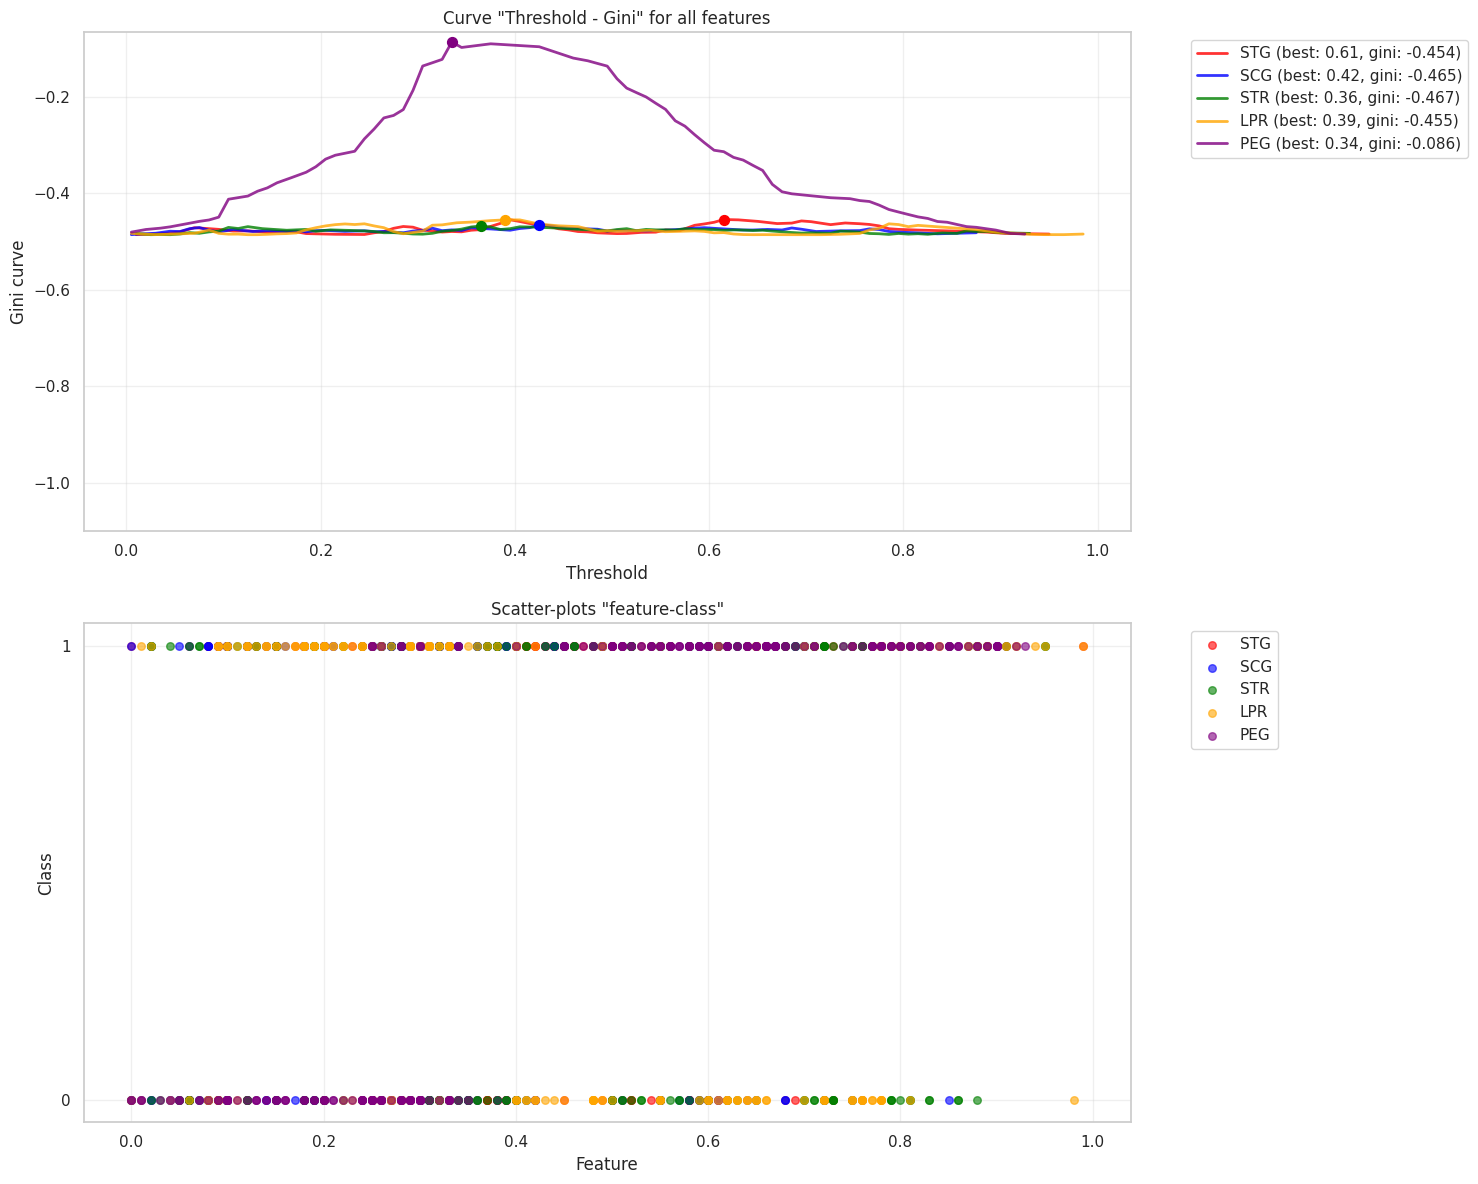


SEPARATE PLOTS FOR ALL FEATURES


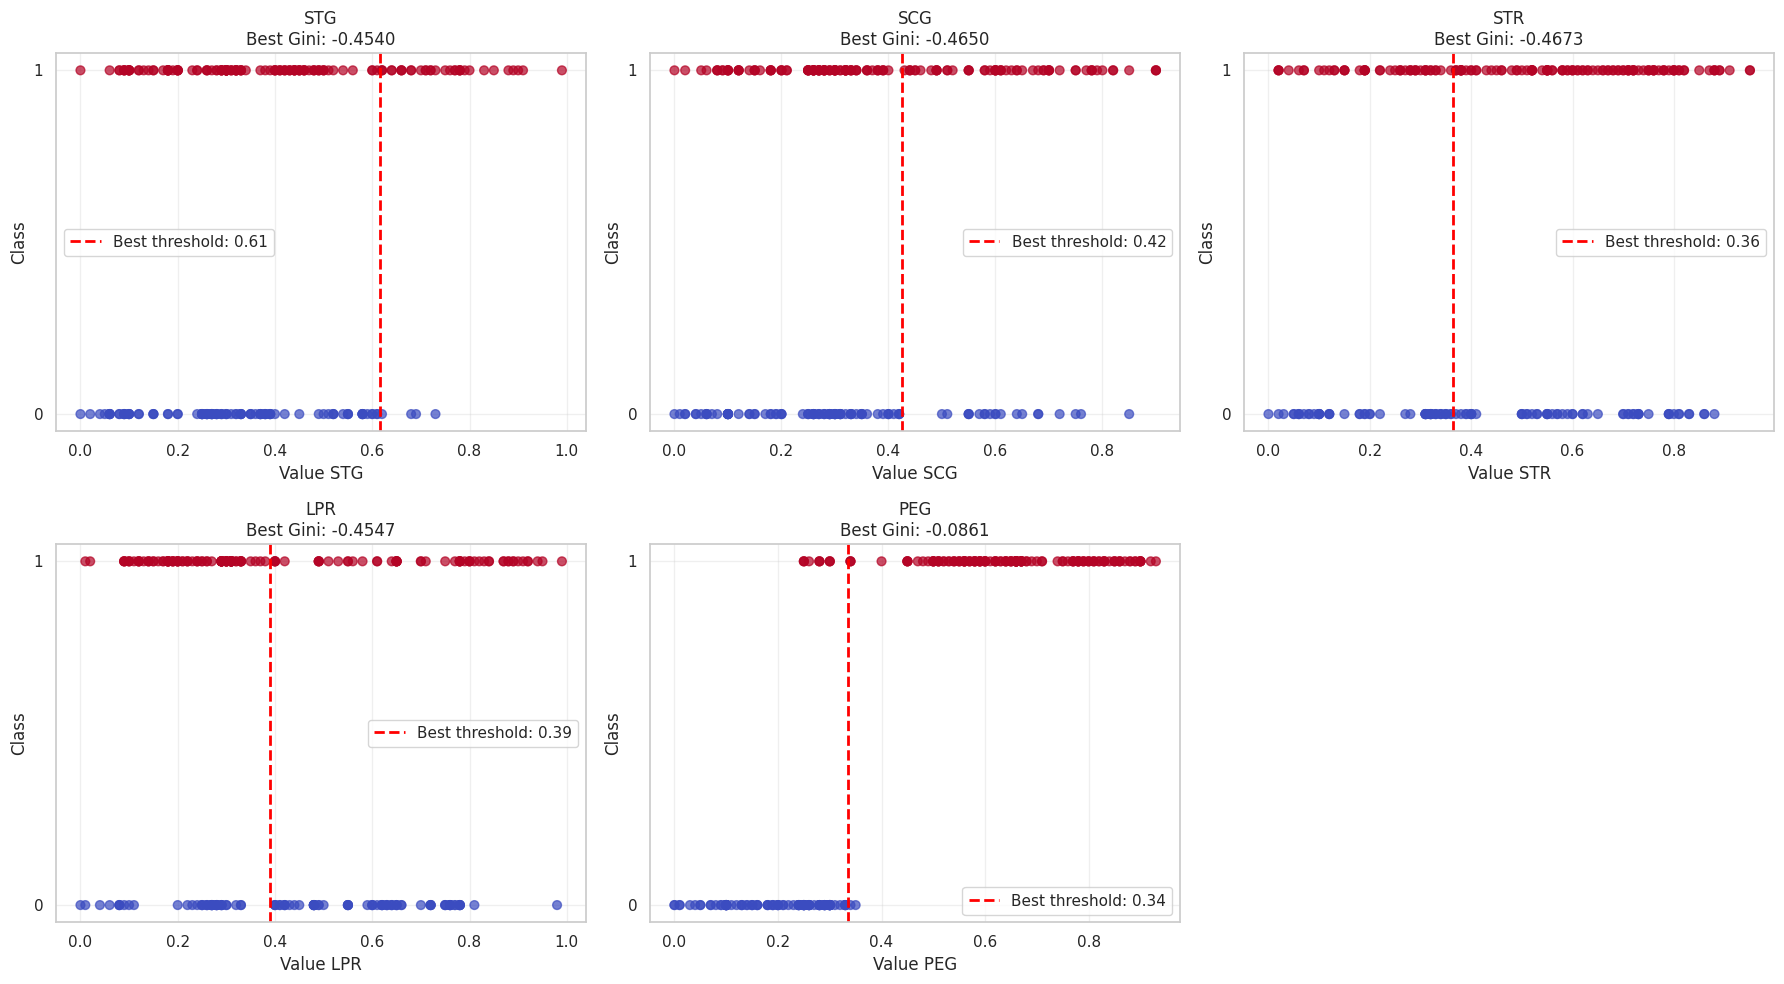


COMPARISON OF FEATURES BY THE QUALITY OF SEPARATION
Feature         Best threshold Gini    
------------------------------------------------------------
PEG             0.3350       -0.0861 
STG             0.6150       -0.4540 
LPR             0.3900       -0.4547 
SCG             0.4250       -0.4650 
STR             0.3650       -0.4673 


In [91]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15, 12))

colors = ['red', 'blue', 'green', 'orange', 'purple']
best_thresholds = {}

print("Features analisys:")
print("=" * 50)

for i, feature in enumerate(feature_columns):
    feature_vector = df[feature].values
    target_vector = df[target_column].values

    thresholds, ginis, best_threshold, best_gini = find_best_split(
        feature_vector, target_vector
    )

    best_thresholds[feature] = (best_threshold, best_gini)
    if len(thresholds) > 0:
        ax1.plot(thresholds, ginis,
                color=colors[i], label=f'{feature} (best: {best_threshold:.2f}, gini: {best_gini:.3f})',
                linewidth=2, alpha=0.8)
        ax1.scatter(best_threshold, best_gini, color=colors[i], s=50, zorder=5)

    ax2.scatter(feature_vector, target_vector,
               color=colors[i], alpha=0.6, label=feature, s=30)

    print(f"{feature}:")
    print(f"  Best threshold: {best_threshold if best_threshold is not None else 'N/A'}")
    print(f"  Best Gini: {best_gini:.4f}")
    print(f"  Values range: [{feature_vector.min():.2f}, {feature_vector.max():.2f}]")
    print(f"  Unique thresholds: {len(thresholds)}")
    print()

ax1.set_xlabel('Threshold')
ax1.set_ylabel('Gini curve')
ax1.set_title('Curve "Threshold - Gini" for all features')
ax1.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
ax1.grid(True, alpha=0.3)
ax1.set_ylim(bottom=-1.1)

ax2.set_xlabel('Feature')
ax2.set_ylabel('Class')
ax2.set_title('Scatter-plots "feature-class"')
ax2.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
ax2.grid(True, alpha=0.3)
ax2.set_yticks([0, 1])

plt.tight_layout()
plt.show()

print("\n" + "="*60)
print("SEPARATE PLOTS FOR ALL FEATURES")
print("="*60)

fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.flatten()

for i, feature in enumerate(feature_columns):
    if i < len(axes):
        feature_vector = df[feature].values
        target_vector = df[target_column].values

        best_threshold, best_gini = best_thresholds[feature]

        scatter = axes[i].scatter(feature_vector, target_vector,
                                 c=target_vector, cmap='coolwarm', alpha=0.7, s=40)

        if best_threshold is not None:
            axes[i].axvline(x=best_threshold, color='red', linestyle='--',
                           linewidth=2, label=f'Best threshold: {best_threshold:.2f}')

        axes[i].set_xlabel(f'Value {feature}')
        axes[i].set_ylabel('Class')
        axes[i].set_title(f'{feature}\nBest Gini: {best_gini:.4f}')
        axes[i].legend()
        axes[i].grid(True, alpha=0.3)
        axes[i].set_yticks([0, 1])

for i in range(len(feature_columns), len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

print("\n" + "="*60)
print("COMPARISON OF FEATURES BY THE QUALITY OF SEPARATION")
print("="*60)

sorted_features = sorted(best_thresholds.items(),
                        key=lambda x: x[1][1] if x[1][1] != -float('inf') else -10,
                        reverse=True)

print(f"{'Feature':<15} {'Best threshold':<12} {'Gini':<8}")
print("-" * 60)
for feature, (threshold, gini) in sorted_features:
    threshold_str = f"{threshold:.4f}" if threshold is not None else "N/A"
    gini_str = f"{gini:.4f}" if gini != -float('inf') else "N/A"

    print(f"{feature:<15} {threshold_str:<12} {gini_str:<8}")

__Задание 5. (0.5 балла)__

Исходя из кривых значений критерия Джини, по какому признаку нужно производить деление выборки на два поддерева? Согласуется ли этот результат с визуальной оценкой scatter-графиков? Как бы охарактеризовали вид кривой для "хороших" признаков, по которым выборка делится почти идеально? Чем отличаются кривые для признаков, по которым деление практически невозможно?

**Ответ:**
Деление нужно производить по признаку PEG, т.к. значение Джини = -0.0861 (на порядок лучше других) - близко к идеальному значению (0).Остальные признаки имеют Джини ~ -0.46, что гораздо хуже.

Это согласуется с визуальной оценкой scatter-графиков, на графике PEG есть четкое разделение классов вокруг порога, минимальное перекрытие распределений классов, явная граница между классами 0 и 1. У остальных признаков можно наблюдать сильное перекрытие распределений и размытую границу между классами.

Для хорошего признака (PEG) кривая Джини имеет резкий высокий пик в районе оптимального порога и малую ширину пика. Для плохих признаков кривая представляет низкий пологий холм, который мало меняется по порогам.

__Задание 6. (1.5 балла).__

Разберитесь с уже написанным кодом в классе DecisionTree модуля hw2code.py. Найдите ошибки в реализации метода \_fit_node. Напишите функцию \_predict_node.

 Построение дерева осуществляется согласно базовому жадному алгоритму, предложенному в лекции. Выбор лучшего разбиения необходимо производить по критерию Джини. Критерий останова: все объекты в листе относятся к одному классу или ни по одному признаку нельзя разбить выборку. Ответ в листе: наиболее часто встречающийся класс в листе. Для категориальных признаков выполняется преобразование, описанное в лекции в разделе «Учет категориальных признаков».

#Смотри задание 7

__Задание 7. (0.5 балла)__

Протестируйте свое решающее дерево на датасете [mushrooms](https://archive.ics.uci.edu/ml/datasets/Mushroom). Вам нужно скачать таблицу agaricus-lepiota.data (лежит на гитхабе вместе с заданием), прочитать ее с помощью pandas, применить к каждому столбцу LabelEncoder (из sklearn), чтобы преобразовать строковые имена категорий в натуральные числа. Первый столбец — это целевая переменная (e — edible, p — poisonous) Мы будем измерять качество с помощью accuracy, так что нам не очень важно, что будет классом 1, а что — классом 0. Обучите решающее дерево на половине случайно выбранных объектов (признаки в датасете категориальные) и сделайте предсказания для оставшейся половины. Вычислите accuracy.

У вас должно получиться значение accuracy, равное единице (или очень близкое к единице), и не очень глубокое дерево.

In [104]:
from sklearn.preprocessing import LabelEncoder

class DecisionTree:
    def __init__(self, feature_types, max_depth=None, min_samples_split=None, min_samples_leaf=None):
        if np.any(list(map(lambda x: x != "real" and x != "categorical", feature_types))):
            raise ValueError("There is unknown feature type")

        self._tree = {}
        self._feature_types = feature_types
        self._max_depth = max_depth
        self._min_samples_split = min_samples_split
        self._min_samples_leaf = min_samples_leaf

    def get_params(self, deep=True):
        return {
            "feature_types": self._feature_types,
            "max_depth": self._max_depth,
            "min_samples_split": self._min_samples_split,
            "min_samples_leaf": self._min_samples_leaf
        }

    def set_params(self, **params):
        for key, value in params.items():
            setattr(self, f"_{key}", value)
        return self

    def _fit_node(self, sub_X, sub_y, node, depth=0):
        stop_conditions = [
            np.all(sub_y == sub_y[0]),
            self._max_depth is not None and depth >= self._max_depth,
            self._min_samples_split is not None and len(sub_y) < self._min_samples_split
        ]

        if any(stop_conditions):
            node["type"] = "terminal"
            node["class"] = Counter(sub_y).most_common(1)[0][0]
            return

        best_feature, best_threshold, best_gini, best_split_mask = None, None, None, None

        for feature_idx in range(sub_X.shape[1]):
            feature_type = self._feature_types[feature_idx]

            if feature_type == "real":
                feature_vector = sub_X[:, feature_idx]
            else:
                counts = Counter(sub_X[:, feature_idx])
                positives = sub_y == 1
                clicks = Counter(sub_X[positives, feature_idx]) if np.any(positives) else Counter()

                category_ratios = {
                    cat: clicks.get(cat, 0) / count for cat, count in counts.items()
                }
                sorted_cats = sorted(category_ratios.items(), key=lambda x: x[1])
                cat_to_num = {cat: i for i, (cat, _) in enumerate(sorted_cats)}

                feature_vector = np.array([cat_to_num.get(x, -1) for x in sub_X[:, feature_idx]])

            if len(np.unique(feature_vector)) < 2:
                continue

            _, _, threshold, gini = find_best_split(feature_vector, sub_y)

            if best_gini is None or gini > best_gini:
                best_gini = gini
                best_feature = feature_idx
                best_split_mask = feature_vector < threshold

                if feature_type == "real":
                    best_threshold = threshold
                else:
                    best_threshold = [cat for cat, num in cat_to_num.items() if num < threshold]

        if best_feature is None:
            node["type"] = "terminal"
            node["class"] = Counter(sub_y).most_common(1)[0][0]
            return

        if self._min_samples_leaf is not None:
            left_count, right_count = np.sum(best_split_mask), np.sum(~best_split_mask)
            if left_count < self._min_samples_leaf or right_count < self._min_samples_leaf:
                node["type"] = "terminal"
                node["class"] = Counter(sub_y).most_common(1)[0][0]
                return

        node.update({
            "type": "nonterminal",
            "feature_split": best_feature,
            "left_child": {},
            "right_child": {}
        })

        if self._feature_types[best_feature] == "real":
            node["threshold"] = best_threshold
        else:
            node["categories_split"] = best_threshold

        self._fit_node(sub_X[best_split_mask], sub_y[best_split_mask], node["left_child"], depth + 1)
        self._fit_node(sub_X[~best_split_mask], sub_y[~best_split_mask], node["right_child"], depth + 1)


    def _predict_node(self, x, node):
        if node["type"] == "terminal":
            return node["class"]

        feature_idx = node["feature_split"]
        feature_type = self._feature_types[feature_idx]

        if feature_type == "real":
            go_left = x[feature_idx] < node["threshold"]
        else:
            go_left = x[feature_idx] in node["categories_split"]

        next_node = node["left_child"] if go_left else node["right_child"]
        return self._predict_node(x, next_node)

    def fit(self, X, y):
        self._fit_node(X, y, self._tree)

    def predict(self, X):
        predicted = []
        for x in X:
            predicted.append(self._predict_node(x, self._tree))
        return np.array(predicted)


mushrooms = pd.read_csv('/content/drive/MyDrive/ml_hw2/data/datasets/agaricus-lepiota.data', header=None)

X = mushrooms.iloc[:, 1:].values
y = mushrooms.iloc[:, 0].values

le = LabelEncoder()
y = le.fit_transform(y)

for i in range(X.shape[1]):
    le = LabelEncoder()
    X[:, i] = le.fit_transform(X[:, i])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

feature_types = ['categorical'] * X.shape[1]
tree = DecisionTree(feature_types)
tree.fit(X_train, y_train)

y_pred = tree.predict(X_test)
acc = accuracy_score(y_test, y_pred)

print(f'Accuracy on test data: {acc:.4f}')
print(f'Count of right predictions: {np.sum(y_pred == y_test)} из {len(y_test)}')

Accuracy on test data: 1.0000
Count of right predictions: 4062 из 4062


__Задание 8. (бонус, 1 балл)__

Реализуйте в классе DecisionTree поддержку параметров max_depth, min_samples_split и min_samples_leaf по аналогии с DecisionTreeClassifier. Постройте графики зависимости качества предсказания в зависимости от этих параметров для набора данных tic-tac-toe (см. следующий пункт).

#Смотри задание 7

__Задание 9. (2 балла)__

Загрузите следующие наборы данных (напомним, что pandas умеет загружать файлы по url, в нашем случае это файл \*.data), предварительно ознакомившись с описанием признаков и целевой переменной в каждом из них (она записаны в Data Folder, в файле *.names):
* [mushrooms](https://archive.ics.uci.edu/ml/datasets/Mushroom) (загрузили в предыдущем пункте, классы записаны в нулевом столбце)
* [tic-tac-toe](https://archive.ics.uci.edu/ml/datasets/Tic-Tac-Toe+Endgame) (классы записаны в последнем столбце, датасет лежит на гитхабе вместе с заданием)
* [cars](https://archive.ics.uci.edu/ml/datasets/Car+Evaluation) (классы записаны в последнем столбце, считаем что unacc, acc — это класс 0, good, vgood — класс 1)
* [nursery](https://archive.ics.uci.edu/ml/datasets/Nursery) (классы записаны в последнем столбце, считаем, что not_recom и recommend — класс 0, very_recom, priority, spec_prior — класс 1).

Закодируйте категориальные признаки, использовав LabelEncoder. С помощью cross_val_score (cv=10) оцените accuracy на каждом из этих наборов данных следующих алгоритмов:
* DecisionTree, считающий все признаки вещественными
* DecisionTree, считающий все признаки категориальными
* DecisionTree, считающий все признаки вещественными + one-hot-encoding всех признаков
* DecisionTreeClassifier из sklearn. Запишите результат в pd.DataFrame (по строкам — наборы данных, по столбцам — алгоритмы).

Рекомендации:
* Чтобы cross_val_score вычисляла точность, нужно передать scoring=make_scorer(accuracy_score), обе фукнции из sklearn.metrics.
* Если вам позволяет память (а она скорее всего позволяет), указывайте параметр sparse=False в OneHotEncoder (если вы, конечно, используете его). Иначе вам придется добиваться того, чтобы ваша реализация дерева умела работать с разреженными матрицами (что тоже, в целом, не очень сложно).

In [109]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, make_scorer
from sklearn.tree import DecisionTreeClassifier

mushrooms = pd.read_csv('/content/drive/MyDrive/ml_hw2/data/datasets/agaricus-lepiota.data', header=None)
tic_tac_toe = pd.read_csv('/content/drive/MyDrive/ml_hw2/data/datasets/tic-tac-toe-endgame.csv', header=None)
cars = pd.read_csv('/content/drive/MyDrive/ml_hw2/data/datasets/car.data', header=None)
nursery = pd.read_csv('/content/drive/MyDrive/ml_hw2/data/datasets/nursery.data', header=None)

datasets = {
    'mushrooms': mushrooms,
    'tic_tac_toe': tic_tac_toe,
    'cars': cars,
    'nursery': nursery
}

def prepare_data(df, dataset_name):
    if dataset_name == 'mushrooms':
        X = df.iloc[:, 1:].values
        y = df.iloc[:, 0].values
    else:
        X = df.iloc[:, :-1].values
        y = df.iloc[:, -1].values

    le_y = LabelEncoder()
    y = le_y.fit_transform(y)

    if dataset_name == 'cars':
        y_binary = np.zeros_like(y)
        class_names = le_y.classes_
        good_classes = [i for i, cls in enumerate(class_names) if cls in ['good', 'vgood']]
        for cls_idx in good_classes:
            y_binary[y == cls_idx] = 1
        y = y_binary

    elif dataset_name == 'nursery':
        y_binary = np.zeros_like(y)
        class_names = le_y.classes_
        positive_classes = [i for i, cls in enumerate(class_names) if cls in ['very_recom', 'priority', 'spec_prior']]
        for cls_idx in positive_classes:
            y_binary[y == cls_idx] = 1
        y = y_binary

    return X, y

results = pd.DataFrame(columns=[
    'DecisionTree_real',
    'DecisionTree_categorical',
    'DecisionTree_real_onehot',
    'sklearn_DecisionTree'
], index=['mushrooms', 'tic_tac_toe', 'cars', 'nursery'])

for dataset_name, df in datasets.items():
    print(f"Processing {dataset_name}...")
    X, y = prepare_data(df, dataset_name)

    le_X = LabelEncoder()
    X_encoded = np.zeros_like(X, dtype=float)

    for i in range(X.shape[1]):
        X_encoded[:, i] = le_X.fit_transform(X[:, i])

    encoder = OneHotEncoder(handle_unknown='ignore')
    X_onehot = encoder.fit_transform(X)

    models = {
        'DecisionTree_real': DecisionTree(feature_types=['real'] * X.shape[1]),
        'DecisionTree_categorical': DecisionTree(feature_types=['categorical'] * X.shape[1]),
        'DecisionTree_real_onehot': DecisionTree(feature_types=['real'] * X_onehot.shape[1]),
        'sklearn_DecisionTree': DecisionTreeClassifier(random_state=42)
    }

    for model_name, model in models.items():
        if model_name == 'DecisionTree_real':
            scores = cross_val_score(model, X_encoded, y, cv=10, scoring=make_scorer(accuracy_score))
        elif model_name == 'DecisionTree_categorical':
            scores = cross_val_score(model, X, y, cv=10, scoring=make_scorer(accuracy_score))
        elif model_name == 'DecisionTree_real_onehot':
            scores = cross_val_score(model, X_onehot, y, cv=10, scoring=make_scorer(accuracy_score))
        else:
            scores = cross_val_score(model, X_encoded, y, cv=10, scoring=make_scorer(accuracy_score))

        mean_score = np.mean(scores)
        results.loc[dataset_name, model_name] = mean_score
        print(f"  {model_name}: {mean_score:.4f}")

print("\nFinal Results:")
print(results)

Processing mushrooms...
  DecisionTree_real: 0.9993
  DecisionTree_categorical: 1.0000
  DecisionTree_real_onehot: 0.2108
  sklearn_DecisionTree: 0.9604
Processing tic_tac_toe...
  DecisionTree_real: 0.4971
  DecisionTree_categorical: 0.6013
  DecisionTree_real_onehot: 0.6521
  sklearn_DecisionTree: 0.7854
Processing cars...
  DecisionTree_real: 0.9426
  DecisionTree_categorical: 0.9675
  DecisionTree_real_onehot: 0.9223
  sklearn_DecisionTree: 0.9427
Processing nursery...
  DecisionTree_real: 0.9997
  DecisionTree_categorical: 0.9998
  DecisionTree_real_onehot: 0.6665
  sklearn_DecisionTree: 0.9997

Final Results:
            DecisionTree_real DecisionTree_categorical  \
mushrooms            0.999261                      1.0   
tic_tac_toe          0.497083                  0.60125   
cars                 0.942647                 0.967546   
nursery              0.999691                 0.999846   

            DecisionTree_real_onehot sklearn_DecisionTree  
mushrooms                 

__Задание 10. (1 балла)__

Проанализируйте результаты эксперимента.
Одинаково ли для разных наборов данных ранжируются алгоритмы?
Порассуждайте, почему так происходит.

Обратите внимание на значение признаков в разных наборах данных.
Присутствует ли в результатах какая-то компонента случайности?
Можно ли повлиять на нее и улушить работу алгоритмов?

**Ответ:**
Проведенное сравнение четырех вариантов алгоритмов на четырех различных датасетах показало значительные различия в эффективности алгоритмов в зависимости от природы данных. Не существует универсального лучшего алгоритма, его выбор критически зависит от характеристик конкретного набора данных.

Например, в наборе mushrooms большинство признаков являются бинарными и позволяют чётко разделить классы, благодаря чему любые методы кодирования работают достаточно эффективно. Напротив, в tic-tac-toe категориальная природа признаков делает некорректной вещественную интерпретацию, из-за чего ухудается качество.

На трех из четырех датасетов категориальные деревья показывают лучшие результаты. Это объясняется тем, что все датасеты по своей природе являются категориальными, и прямое использование категориальных разбиений более естественно отражает процесс принятия решений. One-hot encoding показывает наихудшие или близкие к наихудшим результаты. Вероятно, это происходит из-за увеличения количества признаков в разы(проклятье размерности). Также, бинарное представление разрушает естественные категориальные структуры

Элементы случайности присутствуют вследствие кросс-валидации и деревьев решений, использующих рандомизацию, однако эта неопределённость минимальна и слабо влияет на итоговую картину, особенно если зафиксировать значение параметра random_state.

Вставьте что угодно, описывающее ваши впечатления от этого задания: